In [119]:
import pandas as pd

df = pd.read_csv("CMSC320_FinalProj_Database.csv")
df

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjusted Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
0,2016,AAAA,STATEWIDE,None,AAA Repair Unruptured,1.3,30,2358,None,None,None
1,2016,AAAA,STATEWIDE,None,AMI,6.1,3178,52167,None,None,None
2,2016,AAAA,STATEWIDE,None,Acute Stroke,9.1,5482,60184,None,None,None
3,2016,AAAA,STATEWIDE,None,Acute Stroke Hemorrhagic,21.1,2580,12210,None,None,None
4,2016,AAAA,STATEWIDE,None,Acute Stroke Ischemic,5,2258,45141,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
57649,2022,Yuba,Adventist Health and Rideout,106580996,Heart Failure,3.6,23,712,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996,Hip Fracture,4,6,167,As Expected,-121.593602,39.138805
57651,2022,Yuba,Adventist Health and Rideout,106580996,PCI,4.3,7,146,As Expected,-121.593602,39.138805
57652,2022,Yuba,Adventist Health and Rideout,106580996,Pancreatic Resection,NaN,NaN,NaN,NaN,-121.593602,39.138805


In [114]:
# Fill in the missing data points with the estimated mean (10)
df['# of Deaths'] = df['# of Deaths'].replace('.', 10).fillna(10).astype(int)

# Eliminate all outliers
df = df[(df["# of Deaths"] >= df["# of Deaths"].quantile(0.25) -
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25))) &
        (df["# of Deaths"] <= df["# of Deaths"].quantile(0.75) +
         1.5 * (df["# of Deaths"].quantile(0.75) - df["# of Deaths"].quantile(0.25)))]

mean = df['# of Deaths'].mean()
print(f"OVERALL MEAN: {mean}") 
df

OVERALL MEAN: 6.789885422240263


,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjusted Mortality Rate,# of Deaths,# of Cases,Hospital Ratings,LONGITUDE,LATITUDE
7,2016,AAAA,STATEWIDE,None,Espophageal Resection,3.9,11,281,None,None,None
12,2016,AAAA,STATEWIDE,None,Pancreatic Cancer,2,20,1021,None,None,None
16,2016,Alameda,Alameda Hospital,106010735,AAA Repair Unruptured,.,10,.,NaN,-122.253991,37.76266
17,2016,Alameda,Alameda Hospital,106010735,AMI,16.1,3,17,As Expected,-122.253991,37.76266
18,2016,Alameda,Alameda Hospital,106010735,Acute Stroke,23.6,9,74,Worse,-122.253991,37.76266
...,...,...,...,...,...,...,...,...,...,...,...
57647,2022,Yuba,Adventist Health and Rideout,106580996,Carotid Endarterectomy,0,0,23,As Expected,-121.593602,39.138805
57648,2022,Yuba,Adventist Health and Rideout,106580996,GI Hemorrhage,2.5,6,247,As Expected,-121.593602,39.138805
57650,2022,Yuba,Adventist Health and Rideout,106580996,Hip Fracture,4,6,167,As Expected,-121.593602,39.138805
57651,2022,Yuba,Adventist Health and Rideout,106580996,PCI,4.3,7,146,As Expected,-121.593602,39.138805


In [115]:
d = df['# of Deaths'].mean()
d2 = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'].mean()
print(f"Overall mean deaths: {d}") # overall deaths avg (around 14)
print(f"Mean deaths due to Heart Failure: {d2}") # Find the mean death rate of the "Heart Failure" procedure

Overall mean deaths: 6.789885422240263
Mean deaths due to Heart Failure: 7.253761574074074


We want to find whether the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is the same as the overall mean death rate for all procedures with $\alpha = 0.05$.
$ \\ H_0: \mu = 7$
$ \\ H_a: \mu > 7$

In [116]:
from scipy import stats

# Gets the column of deaths due to Heart Failure
deaths = df[df['Procedure/Condition']=='Heart Failure']['# of Deaths']

# The overall mean here is approximately 7 (6.789)
pop_mean = 7

t_statistic, p_value = stats.ttest_1samp(a=deaths, popmean=pop_mean, alternative='greater')
print("P-value:", p_value)

P-value: 0.00685113860015079


Since $p \approx 0.007 < 0.05$, we reject $H_0$ and claim that the total number of inpatient deaths in California's hospitals caused by a "Heart Failure" procedure is significantly greater than the overall average of deaths ($7$).

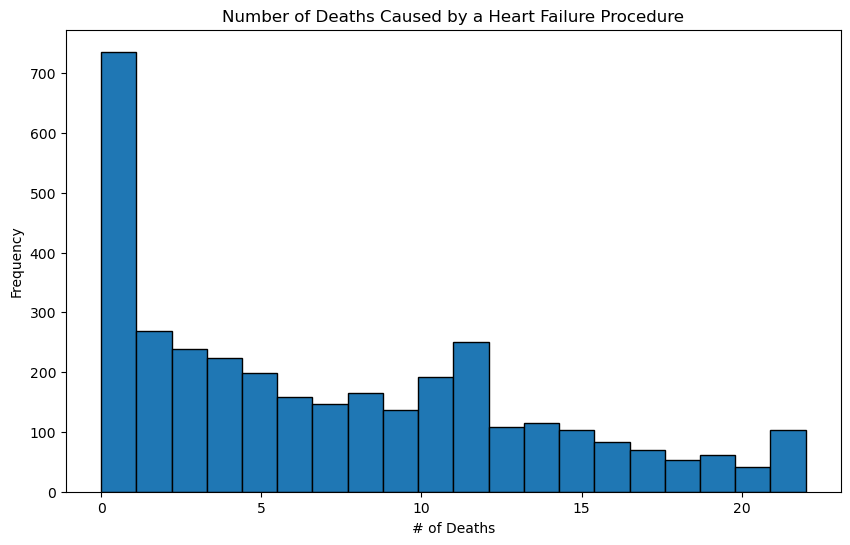

In [117]:
import matplotlib.pyplot as plt

# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df[df['Procedure/Condition']=='Heart Failure']['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Caused by a Heart Failure Procedure')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

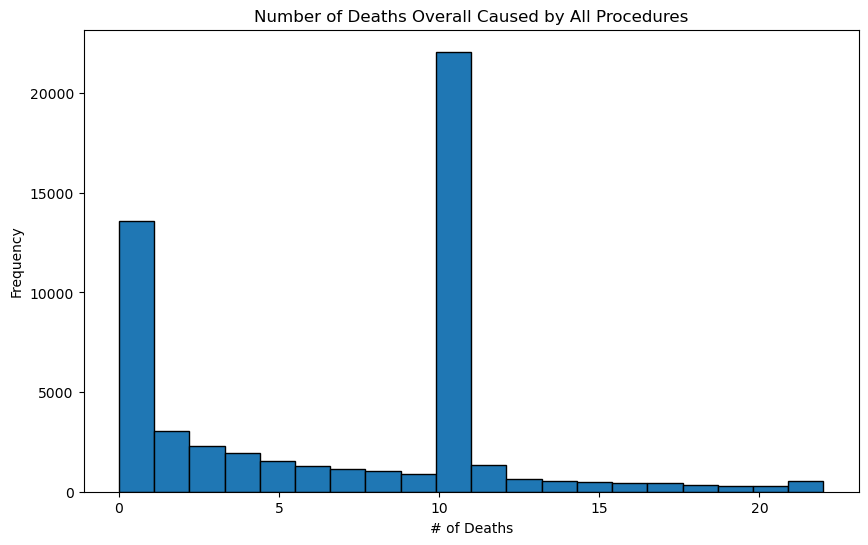

In [118]:
import matplotlib.pyplot as plt

# Data visualization
plt.figure(figsize=(10, 6))
plt.hist(df['# of Deaths'], bins=20, edgecolor='black')
plt.title('Number of Deaths Overall Caused by All Procedures')
plt.xlabel('# of Deaths')
plt.ylabel('Frequency')
plt.show()

# Histogram analysis
From the second histogram, we can see that the most common number of patient deaths due to hospital procedures is $10$ by a large margin. Additionally, from the first histogram, we can see that the distribution of the number of deaths has more spread than the second histogram.

In [120]:
# Calculate the mean of all entries that are not '.' or 
wrong_mean = pd.to_numeric(df['# of Deaths'], errors='coerce').mean()
print(f"MEAN WITH OUTLIERS: {wrong_mean}")

MEAN WITH OUTLIERS: 15.474751086418395


The data above shows significant outliers since the mean without outliers ($\approx$7) and the mean with outliers ($\approx$15) are significantly different.

In [121]:
df['HOSPITAL'].value_counts()

STATEWIDE                                         180
Memorial Hospital of Gardena                      180
Palmdale Regional Medical Center                  180
Madera Community Hospital                         180
San Mateo Medical Center                          180
                                                 ... 
Kaiser Foundation Hospital – Antioch               14
John Muir Medical Center – Concord Campus          14
Kaiser Foundation Hospital – Walnut Creek          14
John Muir Medical Center – Walnut Creek Campus     14
Community Memorial Hospital – San Buenaventura     14
Name: HOSPITAL, Length: 530, dtype: int64

From the counts of each hospital above, we can see that some hospitals were very underrepresented ($14$) while many were very overrepresented ($180$).

Since the population mean is not resistant to outliers, we decided to remove all of the outliers in the dataset at the beginning before proceeding with the preliminary data analysis.